[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.]


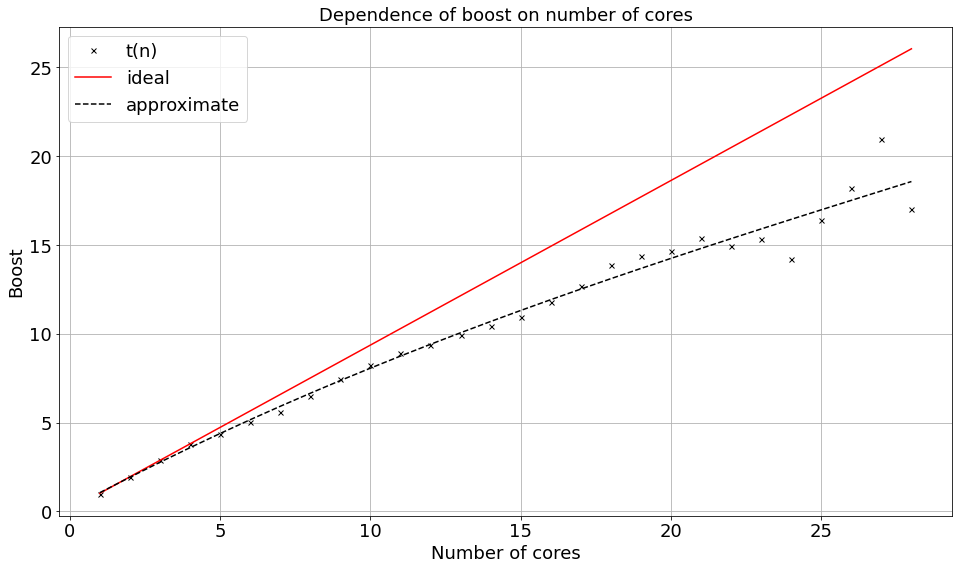

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import os

def loadData() :
    file = open('lgca_time.txt', 'r')
    
    n_cores = np.array([])
    t = np.array([])
    
    for line in file :
        n_cores = np.append(n_cores, float(line.split()[0]))
        t = np.append(t, float(line.split()[1]))
        
    return n_cores, t

def averaging() :
    n_cores, t = loadData()
    new_t = np.zeros(28)
    
    for i in range(1, 29) :
        count = 0
        for j in range(len(n_cores)) :
            if n_cores[j] == i :
                new_t[i - 1] = new_t[i-1] + t[j]
                count += 1
        new_t[i - 1] = new_t[i - 1] / count
              
    return new_t


fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)


x = np.linspace(1, 28, 28)
print(x)
x = x
y = averaging()
y = y[0] / y
y = y


ax.plot(x, y, linestyle = 'None', marker = 'x', color = 'black', markersize = 5, label = 't(n)')
p = np.polyfit(x[0:4], y[0:4], 1)
yi = np.polyval(p, x)
ax.plot(x, yi, linestyle = '-', marker = 'None', color = 'red', label = 'ideal')
p1 = np.polyfit(x, y, 3)
y1 = np.polyval(p1, x)
ax.plot(x, y1, linestyle = '--', marker = 'None', color = 'black', label = 'approximate')


xax = ax.xaxis
xlocs = xax.get_ticklocs()
xlabels = xax.get_ticklabels()
xlines = xax.get_ticklines()

xax.grid(True)

for label in xlabels :
    label.set_color('black')
    label.set_rotation(0)
    label.set_fontsize(18)
    
yax = ax.yaxis
ylocs = yax.get_ticklocs()
ylabels = yax.get_ticklabels()
ylines = yax.get_ticklines()
yax.grid(True)

for label in ylabels :
    label.set_color('black')
    label.set_rotation(0)
    label.set_fontsize(18)
    
plt.xlabel('Number of cores', fontsize = 18)
plt.ylabel('Boost', fontsize = 18)

plt.legend(loc = 'best', fontsize = 18)
plt.title('Dependence of boost on number of cores', fontsize = 18)
os.chdir(os.getcwd() + "\outData")
plt.savefig('result.jpg')
os.chdir(os.getcwd().replace("\outData", ""))
plt.show()